In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city="Houston"

---------------------------------------------- DATA IMPORT ----------------------------------------------

In [2]:
# ===================================== LIST & SALE PRICE ===========================================
# Read in list price data
# list_data=pd.read_csv("data/zillow/Metro_mlp_uc_sfrcondo_raw_month.csv") # monthly data
median_list_price_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/mlp/Metro_mlp_uc_sfrcondo_raw_month.csv?t=1622248243") # direct url
list_data=median_list_price_raw_monthly
# list_data=pd.read_csv("data/zillow/Metro_mlp_uc_sfrcondo_smoothed_week.csv") # weekly data
list_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,...,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,274900.0,269900.0,270000.0,279000.0,289000.0,...,340000.0,342400.0,344000.0,343400.0,339000.0,330099.0,329900.0,340000.0,354000.0,372000.0
1,394913,1,"New York, NY",Msa,NY,524000.0,519000.0,519900.0,539000.0,549000.0,...,630000.0,649000.0,649900.0,655000.0,659000.0,660000.0,669000.0,674900.0,675000.0,668000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,795000.0,799000.0,799000.0,809000.0,840000.0,...,954000.0,975000.0,959000.0,975000.0,989900.0,999000.0,998000.0,999800.0,1015944.0,999999.0
3,394463,3,"Chicago, IL",Msa,IL,300000.0,297990.0,299000.0,319499.0,338999.0,...,349900.0,349900.0,350000.0,349000.0,339000.0,332500.0,325000.0,340000.0,349900.0,350000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,339990.0,340990.0,345000.0,350000.0,359990.0,...,359900.0,359900.0,359999.0,355000.0,350000.0,349900.0,349900.0,352900.0,360000.0,372000.0


In [3]:
# Read in sale price data
sale_data=pd.read_csv("data/zillow/Metro_median_sale_price_uc_SFRCondo_raw_month.csv") # monthly data
median_sale_price_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/median_sale_price/Metro_median_sale_price_uc_SFRCondo_raw_month.csv?t=1622248243") # direct url
sale_data=median_sale_price_raw_monthly
# sale_data=pd.read_csv("data/zillow/Metro_median_sale_price_uc_SFRCondo_smoothed_week.csv") # weekly data
sale_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,102001,0,United States,Country,NaN,192500.0,196000.0,195000.0,197000.0,201900.0,...,274000.0,284900.0,286000.0,289900.0,290000.0,292500.0,290000.0,285000.0,290000.0,305000.0
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,...,450000.0,447000.0,457550.0,460000.0,469900.0,477000.0,470000.0,470000.0,475000.0,484000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,510000.0,500000.0,500000.0,489000.0,485000.0,...,690000.0,715000.0,730000.0,740000.0,740000.0,732000.0,730000.0,725000.0,750000.0,780000.0
3,394463,3,"Chicago, IL",Msa,IL,250000.0,246000.0,249900.0,250000.0,255000.0,...,255000.0,265000.0,269400.0,265000.0,269000.0,260000.0,260000.0,253000.0,252000.0,270000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,145000.0,153350.0,152000.0,156000.0,160000.0,...,290000.0,300000.0,299500.0,298649.0,300745.0,300000.0,300000.0,294000.0,310000.0,321038.0


In [4]:
# ======================================== INVENTORY ==============================================
# Read in inventory days to pending data
inventory_mean_days_to_pending_raw_monthly=pd.read_csv("http://files.zillowstatic.com/research/public_v2/mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv")
# use shorter name acronym "days 2 pending"="d2p"
inventory_d2p_data=inventory_mean_days_to_pending_raw_monthly
inventory_d2p_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,76.0,67.0,58.0,53.0,49.0,...,50.0,45.0,45.0,41.0,41.0,46.0,NaN,NaN,NaN,NaN
1,394913,1,"New York, NY",Msa,NY,104.0,84.0,71.0,72.0,69.0,...,66.0,64.0,64.0,60.0,64.0,74.0,NaN,NaN,NaN,NaN
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,48.0,36.0,33.0,32.0,31.0,...,35.0,34.0,31.0,31.0,31.0,36.0,NaN,NaN,NaN,NaN
3,394463,3,"Chicago, IL",Msa,IL,84.0,66.0,47.0,44.0,43.0,...,47.0,45.0,43.0,40.0,45.0,52.0,NaN,NaN,NaN,NaN
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,63.0,50.0,44.0,39.0,38.0,...,47.0,45.0,44.0,43.0,44.0,46.0,NaN,NaN,NaN,NaN


In [5]:
# Read in for-sale inventory data
for_sale_inventory_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/invt_fs/Metro_invt_fs_uc_sfrcondo_raw_month.csv?t=1622248243")
# use shorter name acronym "for sale"="4s"
inventory_4s_data=for_sale_inventory_raw_monthly
inventory_4s_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,...,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,1531572.0,1370419.0,1377201.0,1404098.0,1541844.0,...,1433303.0,1378327.0,1325389.0,1311079.0,1144377.0,997512.0,1030411.0,905733.0,965625.0,978006.0
1,394913,1,"New York, NY",Msa,NY,74613.0,65674.0,65438.0,73283.0,79244.0,...,82669.0,81013.0,81642.0,80010.0,71003.0,61810.0,60127.0,58213.0,59888.0,62513.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,22375.0,18272.0,19811.0,21876.0,24173.0,...,26361.0,26420.0,26463.0,26327.0,23211.0,19474.0,19584.0,19536.0,21038.0,20655.0
3,394463,3,"Chicago, IL",Msa,IL,48032.0,40624.0,40447.0,43080.0,51640.0,...,52386.0,51355.0,49408.0,48487.0,41674.0,34809.0,34656.0,30684.0,33668.0,35698.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,26702.0,23293.0,22855.0,23461.0,26718.0,...,34051.0,31525.0,28740.0,30137.0,26317.0,22589.0,22951.0,19743.0,21223.0,21906.0


---------------------------------------------- DATA CLEANING ----------------------------------------------

--- 1. Only retain data for Houston, TX

In [6]:
# Filter list & sale data to Houston TX only
list_data_hou=list_data[list_data['RegionName'].str.contains(city)]
sale_data_hou=sale_data[sale_data['RegionName'].str.contains(city)]
inventory_4s_data_hou=inventory_4s_data[inventory_4s_data['RegionName'].str.contains(city)]
inventory_d2p_data_hou=inventory_d2p_data[inventory_d2p_data['RegionName'].str.contains(city)]

In [7]:
print(len(list_data_hou), len(sale_data_hou), len(inventory_4s_data_hou), len(inventory_d2p_data_hou))

1 1 1 1


--- 2. Unpivot data to convert multiple date columns of data into a single Date column and a corresponding Value column

In [8]:
list_data_hou_reformatted=pd.melt(list_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianListPrice')
sale_data_hou_reformatted=pd.melt(sale_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianSalePrice')
inventory_4s_data_hou_reformatted=pd.melt(inventory_4s_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='Inventory4Sale')
inventory_d2p_data_hou_reformatted=pd.melt(inventory_d2p_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='InventoryDays2Pending')

In [9]:
list_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,314407.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,317084.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0


In [10]:
sale_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianSalePrice
0,394692,6,"Houston, TX",Msa,TX,2008-02-29,152000.0
1,394692,6,"Houston, TX",Msa,TX,2008-03-31,153000.0
2,394692,6,"Houston, TX",Msa,TX,2008-04-30,152000.0
3,394692,6,"Houston, TX",Msa,TX,2008-05-31,157900.0
4,394692,6,"Houston, TX",Msa,TX,2008-06-30,161500.0


In [11]:
inventory_4s_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Inventory4Sale
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,34706.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,31828.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,32421.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,32192.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,36684.0


In [12]:
inventory_d2p_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,46.0


In [13]:
# merge list and sale data frames
list_n_sale_data_hou_reformatted=pd.merge(list_data_hou_reformatted,
                                  sale_data_hou_reformatted, 
                                  on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])
# merge inventory "for sale" and "days to pending" data frames
inventory_data_hou_reformatted=pd.merge(inventory_4s_data_hou_reformatted, 
                                        inventory_d2p_data_hou_reformatted,
                                        on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])
# merge list&sale and inventory data
all_data_hou_reformatted=pd.merge(list_n_sale_data_hou_reformatted,
                                  inventory_data_hou_reformatted, 
                                  on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])

In [14]:
all_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0


In [15]:
all_data_hou_reformatted['Date'] = all_data_hou_reformatted['Date'].astype('datetime64[ns]')
all_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0


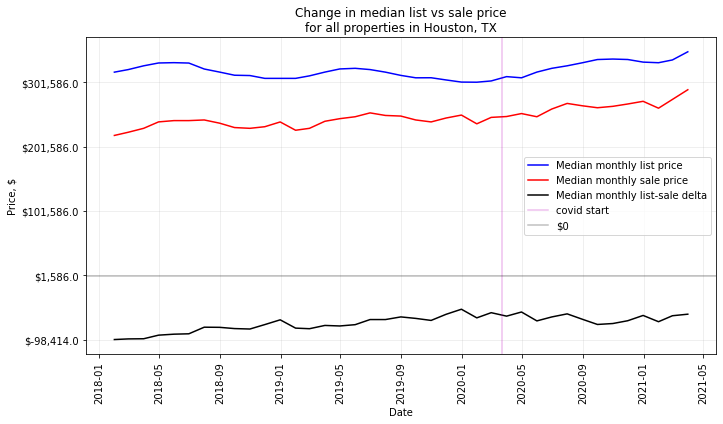

In [16]:
# Plotting list & sale price data
plt.figure(figsize=(10, 6))
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['MedianListPrice'],
         'b', 
         label="Median monthly list price")
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['MedianSalePrice'],
         'r', 
         label="Median monthly sale price")
plt.plot(all_data_hou_reformatted['Date'],
           -all_data_hou_reformatted['MedianListPrice']+all_data_hou_reformatted['MedianSalePrice'],
         'k', 
         label="Median monthly list-sale delta")
plt.xlabel("Date")
plt.ylabel("Price, $")
plt.title(f"Change in median list vs sale price\nfor all properties in {all_data_hou_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

y_ticks=np.arange((-all_data_hou_reformatted['MedianListPrice']+all_data_hou_reformatted['MedianSalePrice']).min(),
                  max(all_data_hou_reformatted['MedianListPrice'].max(),
                      all_data_hou_reformatted['MedianListPrice'].max()),
                  100000)
y_labels=pd.DataFrame(y_ticks)[0].map("${:,}".format).to_list()
plt.yticks(y_ticks,y_labels)

import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='m', alpha=0.25, label="covid start")
plt.axhline(0, c='k', alpha=0.25, label='$0')
plt.legend()

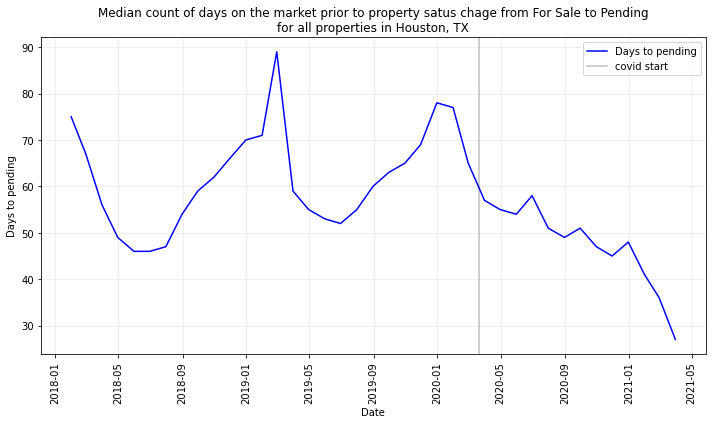

In [17]:
#  Plotting inventory data - Days to Pending
plt.figure(figsize=(10, 6))
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['InventoryDays2Pending'],
         'b', 
         label="Days to pending")
# plt.plot(all_data_hou_reformatted['Date'],
#            all_data_hou_reformatted['MedianSalePrice'],
#          'r', 
#          label="Median monthly sale price")
# plt.plot(all_data_hou_reformatted['Date'],
#            all_data_hou_reformatted['MedianListPrice']-all_data_hou_reformatted['MedianSalePrice'],
#          'k', 
#          label="Median monthly list-sale delta")
plt.xlabel("Date")
plt.ylabel("Days to pending")
plt.title(f"Median count of days on the market prior to property satus chage from For Sale to Pending\nfor all properties in {all_data_hou_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

# y_ticks=np.arange(0,350000,50000)
# y_labels=pd.DataFrame(np.arange(0,350000,50000))[0].map("${:,}".format).to_list()
# plt.yticks(y_ticks,y_labels)

import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.25, label="covid start")
plt.legend()

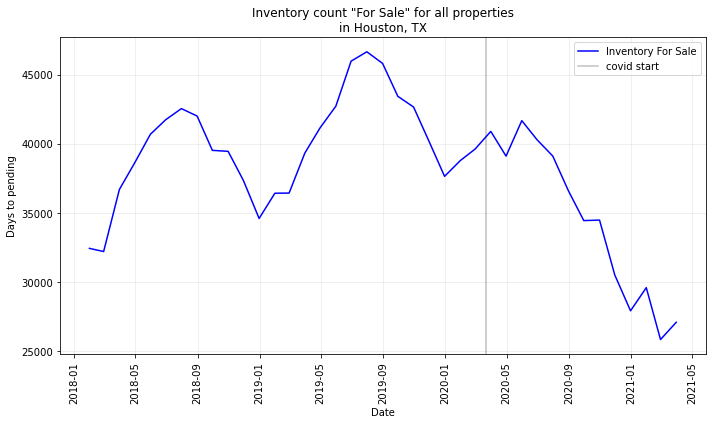

In [18]:
#  Plotting inventory data - Number of properties for sale
plt.figure(figsize=(10, 6))
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['Inventory4Sale'],
         'b', 
         label="Inventory For Sale")
# plt.plot(all_data_hou_reformatted['Date'],
#            all_data_hou_reformatted['MedianSalePrice'],
#          'r', 
#          label="Median monthly sale price")
# plt.plot(all_data_hou_reformatted['Date'],
#            all_data_hou_reformatted['MedianListPrice']-all_data_hou_reformatted['MedianSalePrice'],
#          'k', 
#          label="Median monthly list-sale delta")
plt.xlabel("Date")
plt.ylabel("Days to pending")
plt.title(f"Inventory count \"For Sale\" for all properties\nin {all_data_hou_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

# y_ticks=np.arange(0,350000,50000)
# y_labels=pd.DataFrame(np.arange(0,350000,50000))[0].map("${:,}".format).to_list()
# plt.yticks(y_ticks,y_labels)

import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.25, label="covid start")
plt.legend()

In [19]:
# replot with x-axis in calendar Months only
# Create a months and year column in summary DF to use for plotting differentiation
all_data_hou_reformatted['Month']=pd.DatetimeIndex(all_data_hou_reformatted['Date']).month
all_data_hou_reformatted['Year']=pd.DatetimeIndex(all_data_hou_reformatted['Date']).year
all_data_hou_reformatted['Year'].unique()
# all_data_hou_reformatted['Color']= np.where(

array([2018, 2019, 2020, 2021], dtype=int64)

In [20]:
all_data_hou_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending,Month,Year
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0,1,2018
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0,2,2018
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0,3,2018
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0,4,2018
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0,5,2018


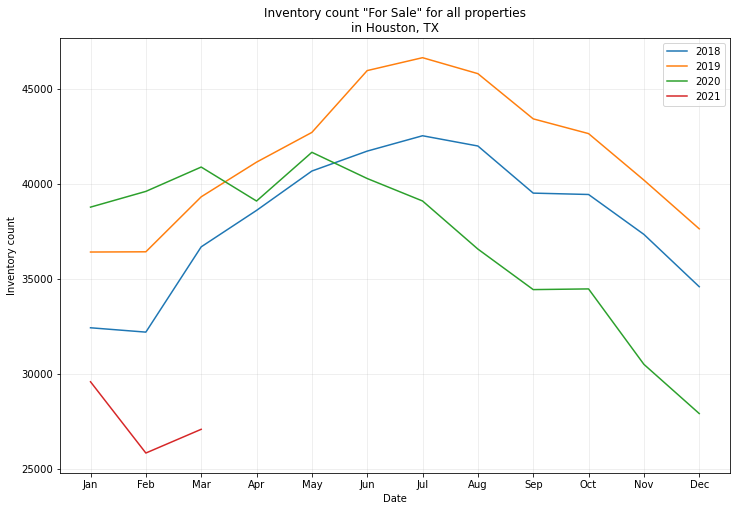

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
for label, grp in all_data_hou_reformatted.groupby('Year'):
    grp.plot(x = 'Month', y = 'Inventory4Sale',ax = ax, label = label)
plt.xlabel("Month")
plt.ylabel("Inventory count")
plt.title(f"Inventory count \"For Sale\" for all properties\nin {all_data_hou_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# plt.xticks(rotation=

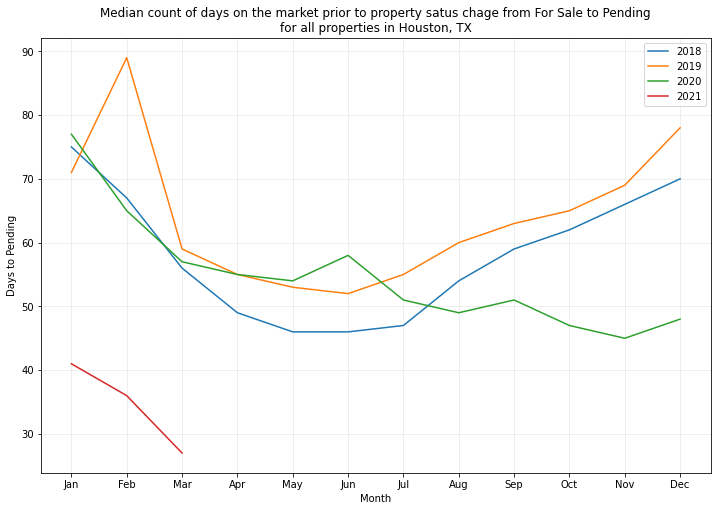

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
for label, grp in all_data_hou_reformatted.groupby('Year'):
    grp.plot(x = 'Month', y = 'InventoryDays2Pending',ax = ax, label = label)
plt.xlabel("Month")
plt.ylabel("Days to Pending")
plt.title(f"Median count of days on the market prior to property satus chage from For Sale to Pending\nfor all properties in {all_data_hou_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
